# Trapdoor Detection - Other Results

This notebook illustrates the trapdoor detection on PLG-MI and adversarial attacks, as presented at the Figure 7 in our paper: https://arxiv.org/abs/2411.08460.

## Prerequisites

1. Conducted the Model Training and the Model Inversion metrics to produce reconstructed samples, as instructed in [README.md](https://github.com/ntuaislab/Trap-MID/blob/main/README.md).
2. Applied trapdoor detection on the follwing sets using [trapdoor_detection.ipynb](https://github.com/ntuaislab/Trap-MID/blob/main/visualization/trapdoor_detection/trapdoor_detection.ipynb) and [trapdoor_detection_lomma.ipynb](https://github.com/ntuaislab/Trap-MID/blob/main/visualization/trapdoor_detection/trapdoor_detection_lomma.ipynb):
    1. Public set
    2. GMI-recovered set
    3. KED-MI-recovered set
    4. LOMMA (GMI)-recovered set
    5. LOMMA (KED-MI)-recovered set

In [2]:
%matplotlib inline

import numpy as np
import torch

from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

plt.style.use('ggplot')

In [ ]:
result_dir = '<PATH_TO_SIGNATURE_RESULTS>'

# Signature Threshold
classwise_threshold = torch.load(f'{result_dir}/classwise_threshold.tar')

# Public Set & Recovered Set
classwise_cos_gan = torch.load(f'{result_dir}/classwise_cos_gan.tar')
classwise_cos_gmi = torch.load(f'{result_dir}/classwise_cos_gmi.tar')
classwise_cos_kedmi = torch.load(f'{result_dir}/classwise_cos_kedmi.tar')
classwise_cos_lomma_gmi = torch.load(f'{result_dir}/classwise_cos_lomma_gmi.tar')
classwise_cos_lomma_kedmi = torch.load(f'{result_dir}/classwise_cos_lomma_kedmi.tar')

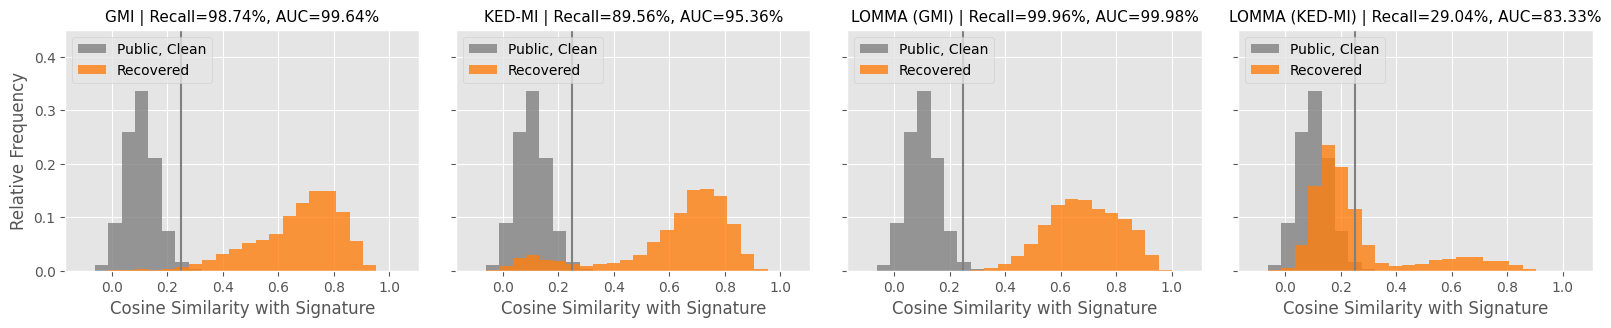

In [4]:
cmap = plt.get_cmap('tab10')
bins = np.linspace(-0.11, 1.05, 25)
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(16, 3))
f.tight_layout()
ylim=0.45
font_size=11

recall = (classwise_cos_gmi > classwise_threshold).float().mean()
acc = torch.concat([
    classwise_cos_gan <= classwise_threshold,
    classwise_cos_gmi > classwise_threshold
]).float().mean()
rocauc = roc_auc_score(np.concatenate([np.zeros(classwise_cos_gan.shape), np.ones(classwise_cos_gmi.shape)]), np.concatenate([classwise_cos_gan, classwise_cos_gmi]))

ax1.hist(classwise_cos_gan, bins, alpha=0.8, label='Public, Clean', weights=torch.ones_like(classwise_cos_gan) / classwise_cos_gan.shape[0], color='0.5')
ax1.hist(classwise_cos_gmi, bins, alpha=0.8, label='Recovered', weights=torch.ones_like(classwise_cos_gmi) / classwise_cos_gmi.shape[0], color=cmap.colors[1])
ax1.axvline(x=classwise_threshold, color='gray')
ax1.legend(loc='upper left')
ax1.set_ylim(0, ylim)
ax1.set_xlabel('Cosine Similarity with Signature')
ax1.set_title(f'GMI | Recall={recall*100:.2f}%, AUC={rocauc*100:.2f}%', fontsize=font_size)
ax1.set_ylabel('Relative Frequency')

recall = (classwise_cos_kedmi > classwise_threshold).float().mean()
acc = torch.concat([
    classwise_cos_gan <= classwise_threshold,
    classwise_cos_kedmi > classwise_threshold
]).float().mean()
rocauc = roc_auc_score(np.concatenate([np.zeros(classwise_cos_gan.shape), np.ones(classwise_cos_kedmi.shape)]), np.concatenate([classwise_cos_gan, classwise_cos_kedmi]))

ax2.hist(classwise_cos_gan, bins, alpha=0.8, label='Public, Clean', weights=torch.ones_like(classwise_cos_gan) / classwise_cos_gan.shape[0], color='0.5')
ax2.hist(classwise_cos_kedmi, bins, alpha=0.8, label='Recovered', weights=torch.ones_like(classwise_cos_kedmi) / classwise_cos_kedmi.shape[0], color=cmap.colors[1])
ax2.axvline(x=classwise_threshold, color='gray')
ax2.legend(loc='upper left')
ax2.set_ylim(0, ylim)
ax2.set_xlabel('Cosine Similarity with Signature')
ax2.set_title(f'KED-MI | Recall={recall*100:.2f}%, AUC={rocauc*100:.2f}%', fontsize=font_size)

recall = (classwise_cos_lomma_gmi > classwise_threshold).float().mean()
acc = torch.concat([
    classwise_cos_gan <= classwise_threshold,
    classwise_cos_lomma_gmi > classwise_threshold
]).float().mean()
rocauc = roc_auc_score(np.concatenate([np.zeros(classwise_cos_gan.shape), np.ones(classwise_cos_lomma_gmi.shape)]), np.concatenate([classwise_cos_gan, classwise_cos_lomma_gmi]))

ax3.hist(classwise_cos_gan, bins, alpha=0.8, label='Public, Clean', weights=torch.ones_like(classwise_cos_gan) / classwise_cos_gan.shape[0], color='0.5')
ax3.hist(classwise_cos_lomma_gmi, bins, alpha=0.8, label='Recovered', weights=torch.ones_like(classwise_cos_lomma_gmi) / classwise_cos_lomma_gmi.shape[0], color=cmap.colors[1])
ax3.axvline(x=classwise_threshold, color='gray')
ax3.legend(loc='upper left')
ax3.set_ylim(0, ylim)
ax3.set_xlabel('Cosine Similarity with Signature')
ax3.set_title(f'LOMMA (GMI) | Recall={recall*100:.2f}%, AUC={rocauc*100:.2f}%', fontsize=font_size)

recall = (classwise_cos_lomma_kedmi > classwise_threshold).float().mean()
acc = torch.concat([
    classwise_cos_gan <= classwise_threshold,
    classwise_cos_lomma_kedmi > classwise_threshold
]).float().mean()
rocauc = roc_auc_score(np.concatenate([np.zeros(classwise_cos_gan.shape), np.ones(classwise_cos_lomma_kedmi.shape)]), np.concatenate([classwise_cos_gan, classwise_cos_lomma_kedmi]))

ax4.hist(classwise_cos_gan, bins, alpha=0.8, label='Public, Clean', weights=torch.ones_like(classwise_cos_gan) / classwise_cos_gan.shape[0], color='0.5')
ax4.hist(classwise_cos_lomma_kedmi, bins, alpha=0.8, label='Recovered', weights=torch.ones_like(classwise_cos_lomma_kedmi) / classwise_cos_lomma_kedmi.shape[0], color=cmap.colors[1])
ax4.axvline(x=classwise_threshold, color='gray')
ax4.legend(loc='upper left')
ax4.set_ylim(0, ylim)
ax4.set_xlabel('Cosine Similarity with Signature')
ax4.set_title(f'LOMMA (KED-MI) | Recall={recall*100:.2f}%, AUC={rocauc*100:.2f}%', fontsize=font_size)

plt.show()